In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from statistics import mean
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Helper method for loading data
def load_data(url):
    df = pandas.read_csv(url)
    data_array = df.to_numpy()
    X = data_array[:, :-1] # for all but last column
    y = data_array[:, -1] # for last column
    dataset = (X, y)
    return dataset

# Loading in CSV's using Pandas then formatting for use in algorithms
steel_plates_fault = load_data("https://raw.githubusercontent.com/saxtonjosh/ML-Classifiers-Hyperparamater-Testing/main/steel-plates-fault_csv.csv")
ionosphere = load_data("https://raw.githubusercontent.com/saxtonjosh/ML-Classifiers-Hyperparamater-Testing/main/ionosphere_csv.csv")
banknotes = load_data("https://raw.githubusercontent.com/saxtonjosh/ML-Classifiers-Hyperparamater-Testing/main/banknote-authentication_csv.csv")

datasets = {"steel_plates_fault": steel_plates_fault,
            "ionosphere": ionosphere,
            "banknotes" : banknotes,
           }

classifiers = {
        "KNearestNeighbor": KNeighborsClassifier,
        "NaiveBayes": GaussianNB,
        "DecisionTree": DecisionTreeClassifier,
        "LogisticRegression": LogisticRegression,
        "GradientBoosting": GradientBoostingClassifier,
        "RandomForest": RandomForestClassifier,
        "NeuralNet": MLPClassifier
}

clf_variables = {
        "n_neighbors": list(range(1, 6)),
        "var_smoothing": [1e-9, 1e-5, 1e-1],
        "max_depth": [1, 3, 5, 8, 10],
        "C": [.1, .5, 1.0, 2.0, 5.0],
        "max_depth": [1, 3, 5, 8, 10],
        "max_depth": [1, 3, 5, 8, 10],
        "alpha": [1e-5, 1e-3, 0.1, 10.0]
}

clf_names = ["KNearestNeighbor", "NaiveBayes", "DecisionTree", "LogisticRegression", "GradientBoosting",
         "RandomForest", "NeuralNet"
        ]

clf_var_names = ["n_neighbors", "var_smoothing", "max_depth", "C", "max_depth", "max_depth", "alpha"]

# Function to dynamically create a classifier instance
def get_clf(name, index):
    if name not in clf_names:
        raise ValueError(f"{name} is not a recognised option")
    classifier = classifiers[name]
    if (name == "NeuralNet"):
        return classifier(max_iter = 800, random_state = 4)
    if (index > 1):
        return classifier(random_state = 4)
    return classifier()

# where the train test splits will be stored
X_trains = []
X_tests = []
y_trains = []
y_tests = []

# preprocess each dataset, split into 50 different training and test sets
for name, ds in datasets.items():
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train = [0] * 50
    X_test = [0] * 50
    y_train = [0] * 50
    y_test = [0] * 50
    
    # split dataset into 50 different train/test splits
    i = 0
    for i in range(50):
        X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X, y, test_size = 0.5, random_state = i)
        i += 1
    
    X_trains.append(X_train)
    X_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)

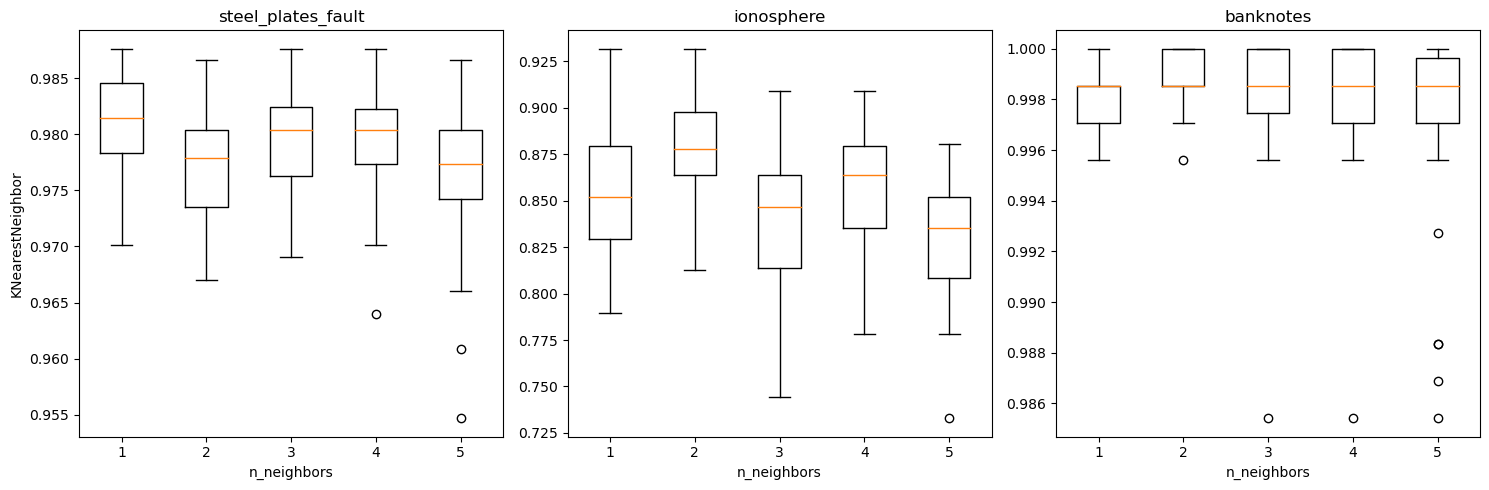

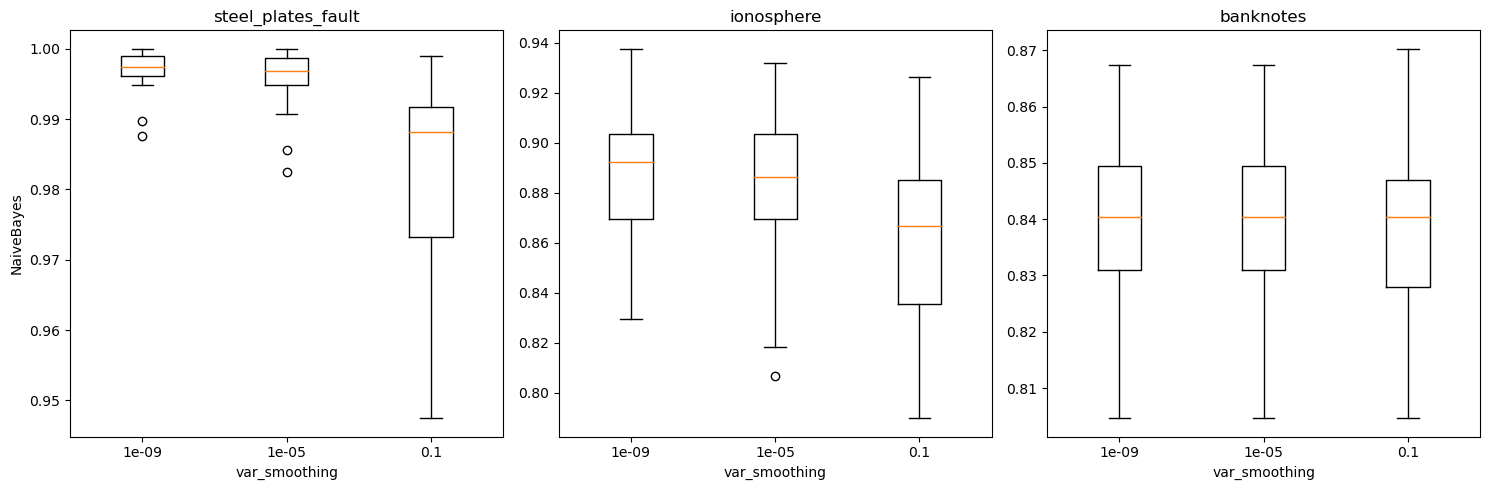

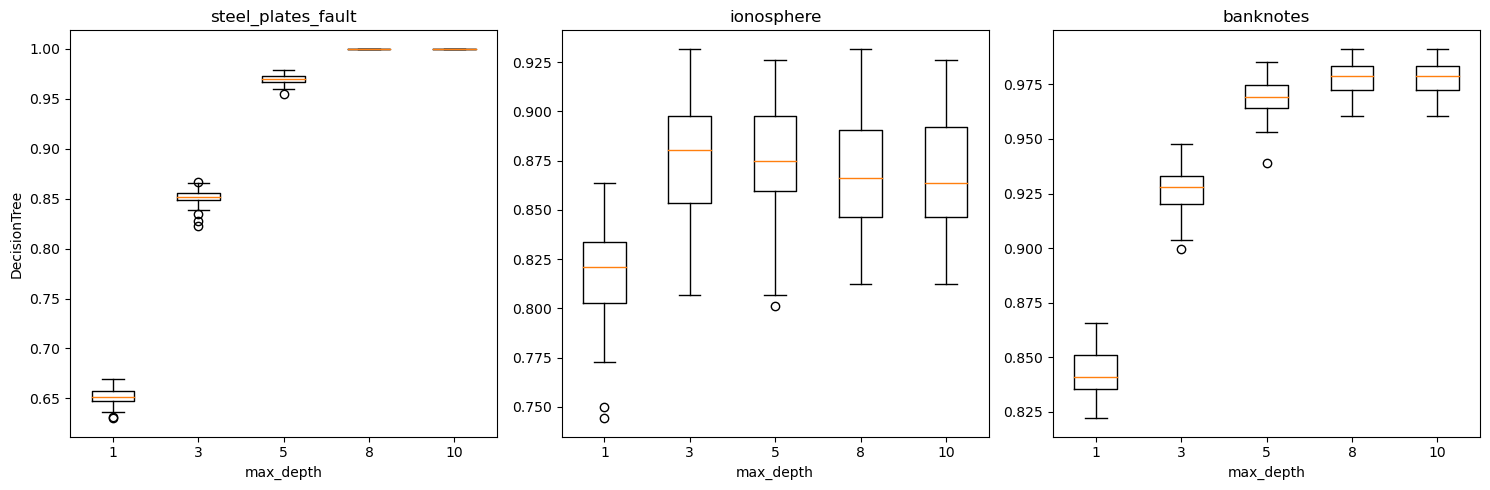

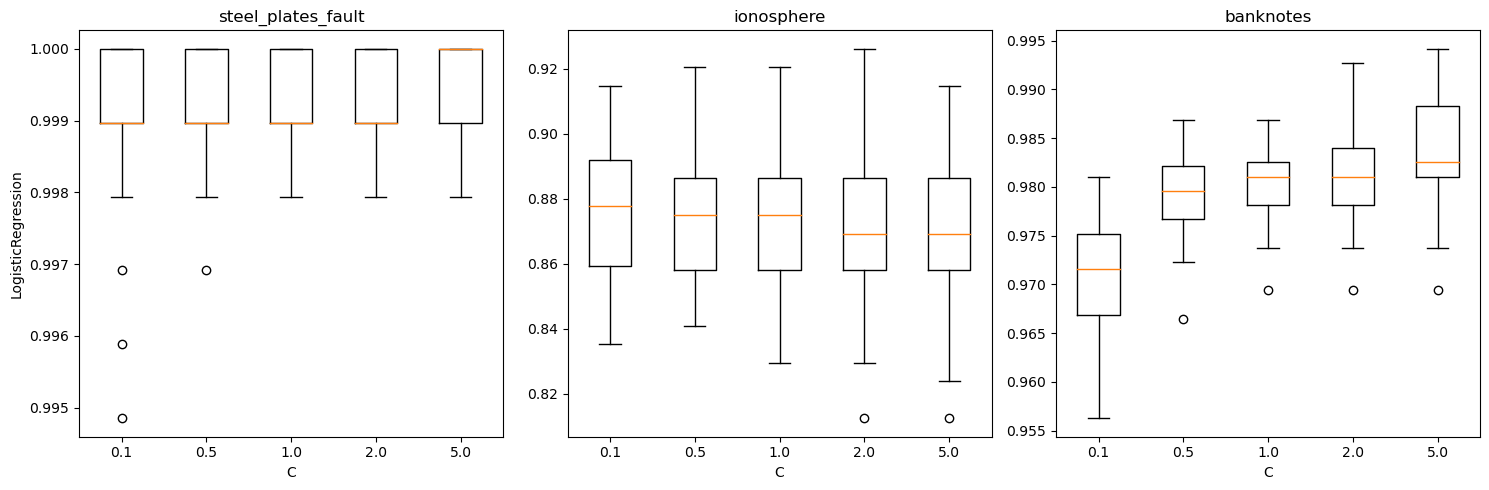

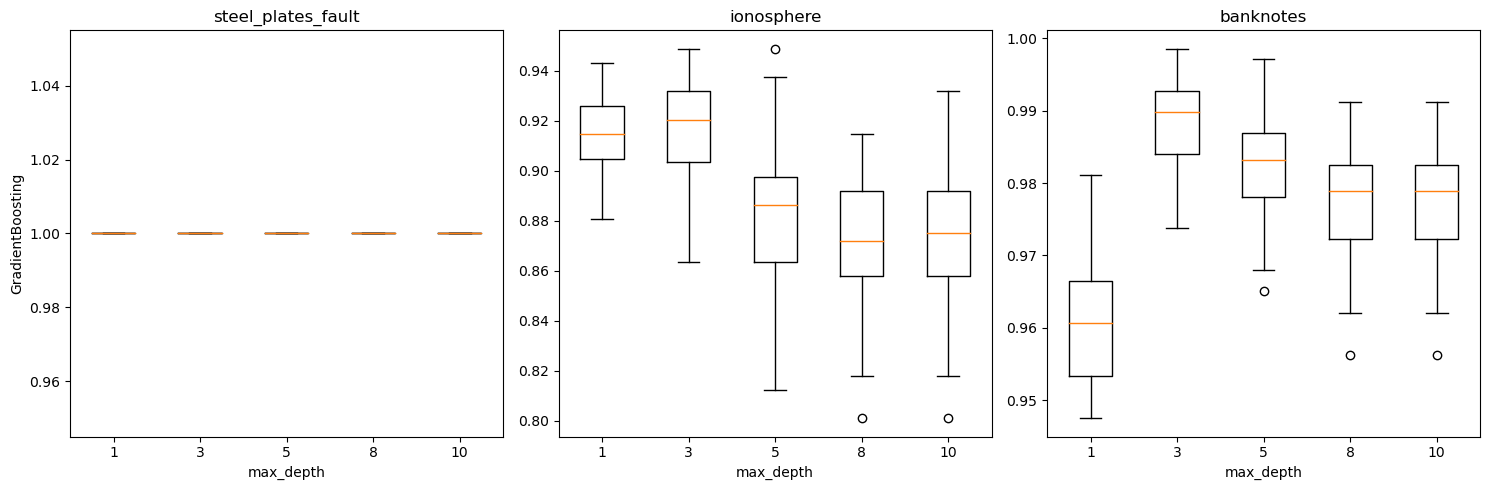

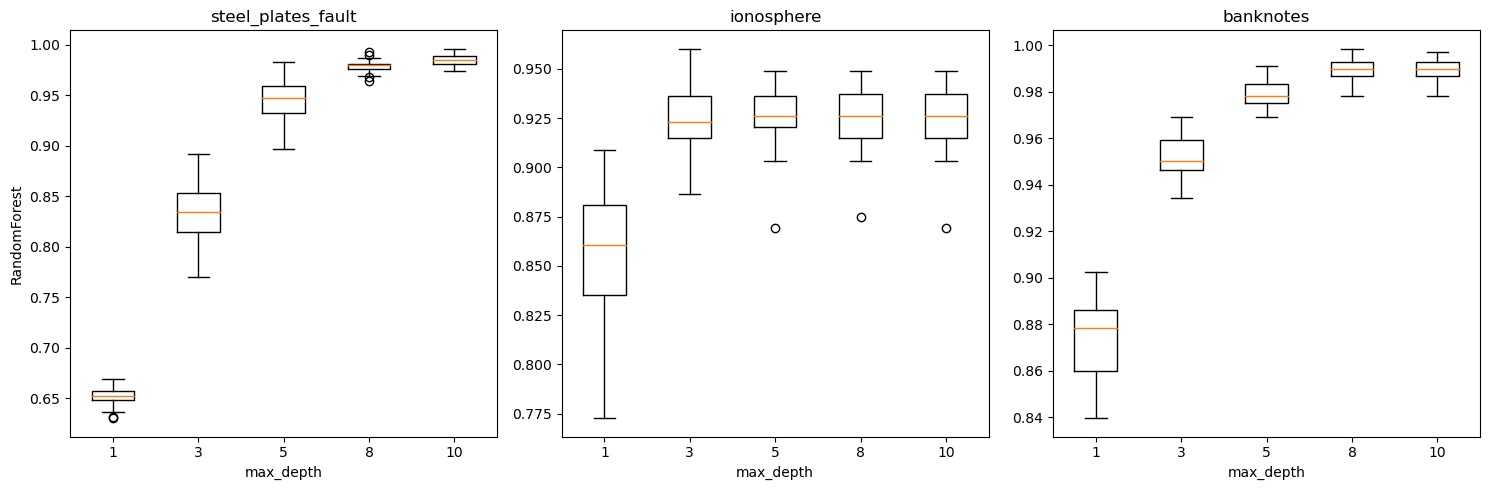

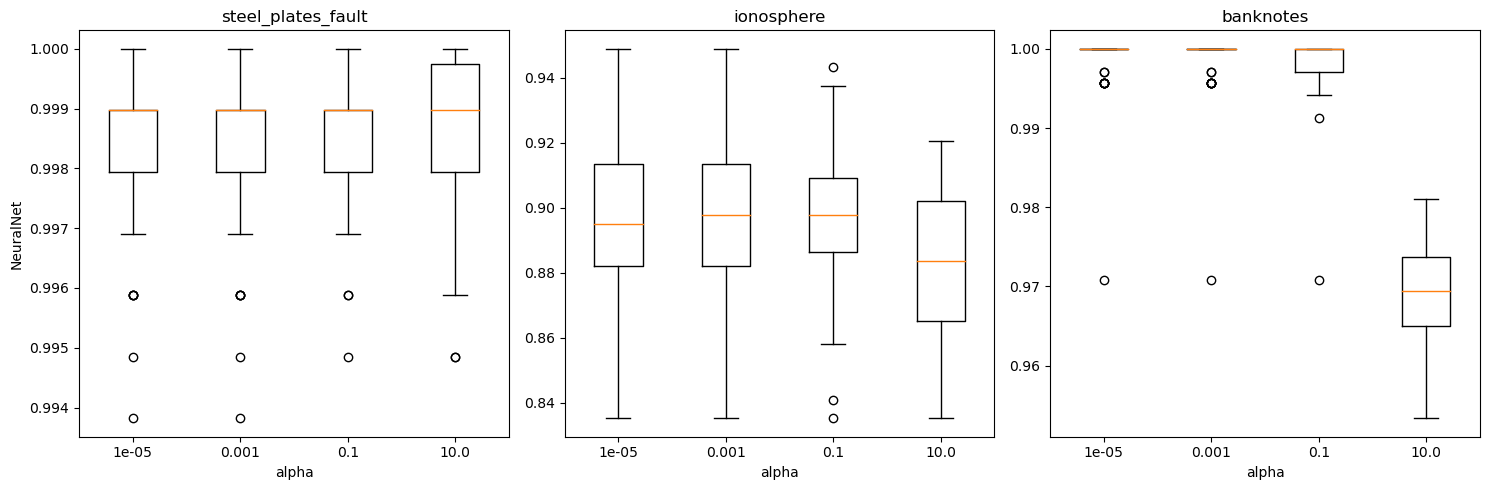

In [2]:
best_accs = np.zeros((7,3))
best_values = np.zeros((7,3))

# iterate over each classifier
for clf_count, (clf_name, var_name) in enumerate(zip(clf_names, clf_var_names)):
    clf = get_clf(clf_name, clf_count)
    params = clf.get_params()
    fig, axs = plt.subplots(1, 3, figsize = (15, 5))
    
    # iterate over each dataset
    for ds_count, ds_name in enumerate(datasets.keys()):
        var_values = clf_variables[var_name]
        ds_accs = []
        
        # change associated hypervariable value per test
        for var_value in var_values:
            params[var_name] = var_value
            clf.set_params(**params)
            val_accs = []

            # repeat classifier fit and evaluate accuracy for each train/test split
            j = 0
            for j in range(50):
                clf.fit(X_trains[ds_count][j], (y_trains[ds_count])[j])
                val_accs.append(clf.score(X_tests[ds_count][j], y_tests[ds_count][j]))
                j += 1
            
            # find the best mean accuracy for each classifer-dataset pairing
            avg = mean(val_accs)
            if (avg >= best_accs[clf_count, ds_count]):
                best_accs[clf_count, ds_count] = avg
                best_values[clf_count, ds_count] = var_value
            ds_accs.append(val_accs)
            
        # draw the boxplots
        axs[ds_count].boxplot(ds_accs)
        axs[ds_count].set_xticklabels(var_values)
        axs[ds_count].set_title(ds_name)
        axs[ds_count].set_xlabel(var_name)
        if (ds_count == 0):
            axs[ds_count].set_ylabel(clf_name)

        ds_count += 1
        
    fig.tight_layout()
    plt.show()
    clf_count += 1

In [5]:
print("Best mean accuracies from the 50 different train-test splits for each of the dataset-classifier pairs\n")
print(pandas.DataFrame(best_accs, clf_names, datasets.keys()))
print("\nBest hyperparameter value based on average accuracy across all train/test splits\n")
print(pandas.DataFrame(best_values, clf_names, datasets.keys()))

Best mean accuracies from the 50 different train-test splits for each of the dataset-classifier pairs

                    steel_plates_fault  ionosphere  banknotes
KNearestNeighbor              0.980947    0.880114   0.998688
NaiveBayes                    0.997281    0.887500   0.840029
DecisionTree                  1.000000    0.875909   0.977493
LogisticRegression            0.999588    0.876023   0.983644
GradientBoosting              1.000000    0.917841   0.988863
RandomForest                  0.984490    0.925568   0.989796
NeuralNet                     0.998723    0.896136   0.998688

Best hyperparameter value based on average accuracy across all train/test splits

                    steel_plates_fault    ionosphere  banknotes
KNearestNeighbor          1.000000e+00  2.000000e+00    2.00000
NaiveBayes                1.000000e-09  1.000000e-09    0.00001
DecisionTree              1.000000e+01  5.000000e+00   10.00000
LogisticRegression        5.000000e+00  1.000000e-01    5.0000